# Práctica 2 Introducción al Machine Learning. Máquinas de Vectores Soporte (SVM).


## Importación de bibliotecas. 

Como siempre, en primer lugar vamos a importar las bibliotecas auxiliares

In [1]:
# Importación de bibliotecas auxiliares
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

Fijamos la semilla para asegurar la reproducibilidad de los resultados.

In [2]:
semilla=80
np.random.seed(semilla)

## Máquinas de Vectores Soporte lineales (SVM lineales) para clasificación.


**Introducción**

Las Máquinas de Vectores Soporte o "Support Vector Machines" (SVM) lineales son redes neuronales que separan diferentes clases mediante la generación de un plano. El plano se construye atendiendo a dos restricciones contrapuestas: maximizar el margen entre clases y minimizar el número de errores en la separación de clases (clasificación). 

Cuando la SVM intenta que no haya ni errores en la separación de las clases ni muestras dentro de la zona del margen, se habla de un problema de tipo "hard margin". Cuando se permite la existencia de muestras de las clases dentro del margen y errores en la clasificación de las muestras se habla de un problema de tipo "soft margin", esta tarea de entrenamiento de la SVM se puede realizar gracias a la introducción de variables de tipo "slack".

El plano que genera una SVM se muestra en la siguiente operación:

$$
\begin{equation*}
    \textbf{w}^T\textbf{x}  + b =0
\end{equation*}
$$


**Conjunto de datos**

Vamos a trabajar con los mismos conjuntos de datos empleados en la sesión de perceptrones. Así, en clasificación trabajamos con el conjunto de datos ("dataset") **Iris**: éste contiene medidas de longitud y ancho de pétalos y sépalos de flores de tres especies del género Iris. El conjunto de datos contiene 150 registros. Vamos a cargar todos los registros, pero para trabajar vamos a emplear únicamente dos características de dos clases: la **longitud y anchura del pétalo** de los registros correspondientes a **versicolor** y **virginica**.


A continuación, cargamos los datos del conjunto de datos Iris como DataFrame para ver su estructura de forma clara. 

In [3]:
# Vamos a trabajar con la estructura de datos de Iris cuya descripción se muestra en: 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

# Importación de los módulos necesarios de la biblioteca scikit learn
from sklearn import datasets

# Importamos el conjunto de datosc como un dataframe para ver la estructura 
caracteristicas,etiquetas = datasets.load_iris(return_X_y = True, as_frame = True)

print('Las características son:')
print(caracteristicas)

print('Las etiquetas son:')
print(etiquetas)

Las características son:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
Las etiquetas s

Seleccionamos el subconjunto de datos deseado.
Versicolor son las etiquetas ("targets") iguales a 1 y virginica las iguales a 2.

In [4]:
# Valores de versicolor y de virginica
clase_A = 1
clase_B = 2

# Valores de las etiquetas de correspondientes a la longitud y anchura del pétalo
caracteristicas = caracteristicas[['petal length (cm)', 'petal width (cm)']]
# Valores de las características de las clases deseadas
X = caracteristicas[ (etiquetas == clase_A) | (etiquetas == clase_B)]
X = X.values

# Valores de las etiquetas de las clases deseadas
y = etiquetas[ (etiquetas == clase_A) | (etiquetas == clase_B)]
y = y.values

Visualizamos las dos clases.

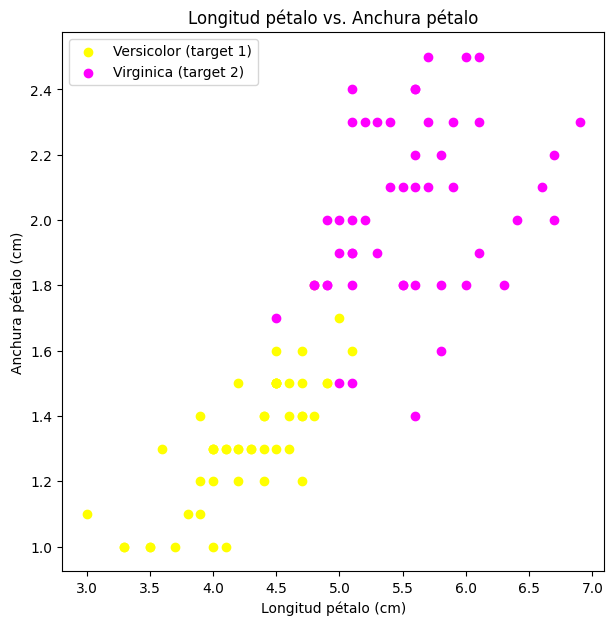

In [5]:
# Figura
fig, ax = plt.subplots(figsize = (7, 7))

condicion = y == clase_A
X_versicolor = X[condicion]
x1 = X_versicolor[:,0]
y1 = X_versicolor[:,1]
colores = 'yellow'
plt.scatter(x1, y1, color=colores, label='Versicolor (target 1)')

condicion = y == clase_B
X_virginica = X[condicion]
x1 = X_virginica[:,0]
y1 = X_virginica[:,1]
colores = 'magenta'
plt.scatter(x1, y1, color=colores, label='Virginica (target 2)')

plt.title("Longitud pétalo vs. Anchura pétalo")
plt.xlabel("Longitud pétalo (cm)")
plt.ylabel("Anchura pétalo (cm)")
plt.legend()

**Conjuntos de entrenamiento y test**

Ahora vamos a generar los conjuntos de entrenamiento y test: como sabemos el primero servirá para estimar los parámetros del modelo y el segundo para comprobar la capacidad de generalización. Seleccionamos un conjunto de test de tamaño igual al 20% del total.

In [6]:
# Importación del método train_test_split
from sklearn.model_selection import train_test_split

# Seleccionamos un 80% de los datos para entrenamiento y un 20% para test
# Fijamos el parámetro random_state para reproducibilidad
X_ent, X_test, y_ent, y_test  = train_test_split(X, y, test_size=0.2, random_state=semilla)

**Estandarización de los datos**

Como las SVM son sensibles a las diferencias de escala de las distintas características de entrada ("features"), antes de entrenar la SVM se aplicará una fase de estandarización de los datos de entrada. La estandarización eliminará la media de cada característica y escalará para que la varianza sea la unidad. De este modo no existirán diferencias de escala en las características de entrada. Para realizar esta tarea emplearemos la clase `StandardScaler()` de Scikit-learn.

En primer lugar importamos la clase y la instanciamos

In [7]:
# Importamos la clase StandardScaler para realizar el escalado
from sklearn.preprocessing import StandardScaler
# Importamos la clase LinearSVC
from sklearn.svm import LinearSVC

# Instanciamos el escalador
scaler = StandardScaler()

Hay que calcular la estandarización con las características del conjunto de entrenamiento y aplicar la transformación generada al conjunto de entrenamiento y de test.

In [8]:
# Estandarización del conjunto de entrenamiento
X_ent_escaladas = scaler.fit_transform(X_ent)

# Aplicamos la estandarización calculada con los datos de entrenamiento a los datos de test
X_test_escaladas = scaler.transform(X_test)

**Programación de SVM en Scikit-learn**

Existen tres clases de SVM en *Scikit-learn* que pueden llevan a cabo la clasificación de clases binarias y de múltiples clases en un conjunto de datos:

`SVC`: emplea kernels por lo que puede realizar clasificación tanto lineal como no lineal. No es adecuada para conjuntos de datos grandes, por encima de las decenas de miles de datos, ya que el tiempo de entrenamiento aumenta de forma cuadrática con el número de datos del conjunto de entrenamiento.

`NuSVC`: es similar a SVC, pero posee un parámetro que controla el número de vectores soporte.

`LinearSVC`: es similar a SVC cuando el kernel de ésta es lineal. Es adecuada para conjuntos de datos grandes. Posee más flexibilidad que SVC en la elección de la función de pérdidas ("loss function")

**Hiperparámetros de LinearSVC**

Como se trata de una problema lineal emplearemos la clase `LinearSVC`, se puede emplear SVC, pero como se ha indicado antes, la primera ofrece algunas ventajas. 

Los principales hiperparámetros de la SVM programada en `LinearSVC` son:

<font color='blue'>loss </font>: función de pérdida, por defecto es la función "squared hinge". No obstante, la función más empleada es "hinge", que es la empleada en la clase SVC.

<font color='blue'>C </font>: parámetro que determina la importancia de los errores de clasificación en el problema de minimización cuando se aplica la técnica de "soft margin". Se suele denominar parámetro de regularización, aunque la cantidad de regularización es inversamente proporcional a C.

<font color='blue'>tol </font>: tolerancia para el criterio de parada.

<font color='blue'>max_iter </font>: número máximo de iteraciones en el algoritmo de entrenamiento.

**Entrenamiento**

Vamos a utilizar la función de pérdida de tipo "hinge" y C igual a 1. Dejaremos el resto de hiperparámetros sin fijar, tomarán los valores por defecto.

In [9]:
# Instanciamos la clase LinearSVC
modelo_SVM_clasif_lineal = LinearSVC(C=1, loss='hinge', random_state=semilla)

# Entrenamos la SVM 
modelo_SVM_clasif_lineal.fit(X_ent_escaladas, y_ent)

LinearSVC(C=1, loss='hinge', random_state=80)

La siguiente función será empleada para dibujar los datos de entrenamiento y de test y la frontera de decisión.

In [10]:
# Importamos la clase DecisionBoundaryDisplay para visionar la frontera de decisión
from sklearn.inspection import DecisionBoundaryDisplay

# Frontera de decisión: definimos una función para reutilizar el código
def dibuja_resultado_clasificador(Entradas, modelo, Salidas, clase_A, clase_B, 
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo_clase_A, simbolo_clase_B, tamano_simbolo, adicion_frontera, curva_clasificador):
    
    '''Dibuja las clases y la frontera de decisión generada por la 
    técnica de machine learning'''

    if (adicion_frontera == 1) | (curva_clasificador==1):
        minX1 = min(Entradas[:, 0])       # Valor mínimo de la 1ª característica
        maxX1 = max(Entradas[:, 0])       # Valor máximo de la 1ª característica
        minX2 = min(Entradas[:, 1])       # Valor mínimo de la 2ª característica
        maxX2 = max(Entradas[:, 1])       # Valor máximo de la 2ª característica
        marginX1 = (maxX1 - minX1) * 0.2  # 20% del rango
        marginX2 = (maxX2 - minX2) * 0.2  # para las dos características
        num_puntos_muestreo = 500

        # Rejilla de puntos
        x1 = np.linspace(minX1 - marginX1, maxX1 + marginX1, num_puntos_muestreo)  # Vector de coord. X1
        x2 = np.linspace(minX2 - marginX2, maxX2 + marginX2, num_puntos_muestreo)  # Vector de coord. X2
        X1_rejilla, X2_rejilla = np.meshgrid(x1, x2)       # Generamos las matrices de coordenadas

        if (adicion_frontera == 1):
            # Concatenación con np.c_
            Z = modelo.predict(np.c_[X1_rejilla.ravel(), X2_rejilla.ravel()]).reshape(X2_rejilla.shape)

            # Dibujo de la frontera de decisión mediante el dibujo con diferentes colores de las clases de
            # cada punto de la rejilla de puntos
            lista_colores=[colores[0], colores[1]]
            dibuja_frontera = DecisionBoundaryDisplay(xx0=X1_rejilla, xx1=X2_rejilla, response=Z)
            dibuja_frontera.plot(plot_method='contourf', colors=lista_colores, alpha=0.1)

            # También se puede utilizar
            plt.contourf(X1_rejilla, X2_rejilla, Z,levels = 2)
        
        elif (curva_clasificador==1):
            # Concatenación con np.c_
            Z = modelo.predict_proba(np.c_[X1_rejilla.ravel(), X2_rejilla.ravel()])
            # Tomamos la probabilidad de una de las clases, por ejemplo, la primera
            Z = Z[:,0]
            Z = Z.reshape(X2_rejilla.shape)
            # Como las probabilidades están entre 0 y 1 y las etiquetas valen 1 o 2, sumamos +1 a las 
            # probabilidades para mejorar la vista
            Z = Z+1
            
            ax = plt.axes(projection='3d')
            ax.plot_surface(X1_rejilla, X2_rejilla, Z, alpha=0.2)
            ax.view_init(elev=10, azim=90)

    

    condicion = Salidas == clase_A
    entradas_clase_A = Entradas[condicion]
    x1_A = entradas_clase_A[:,0]
    x2_A = entradas_clase_A[:,1]
    color_cero = colores[0] 
    if (curva_clasificador==0):
        plt.scatter(x1_A, x2_A, marker=simbolo_clase_A, s=tamano_simbolo, color=color_cero, label=etiqueta_leyenda_cero)
    else:
        y_A = Salidas[condicion]
        ax.scatter(x1_A, x2_A, y_A, marker=simbolo_clase_A, s=tamano_simbolo, color=color_cero, label=etiqueta_leyenda_cero)

    condicion = Salidas == clase_B
    entradas_clase_B = Entradas[condicion]
    x1_B = entradas_clase_B[:,0]
    x2_B = entradas_clase_B[:,1]
    color_uno = colores[1]
    if (curva_clasificador==0):
        plt.scatter(x1_B, x2_B, marker=simbolo_clase_B, s=tamano_simbolo, color=color_uno, label=etiqueta_leyenda_uno)
    else:
        y_B = Salidas[condicion]
        ax.scatter(x1_B, x2_B, y_B, marker=simbolo_clase_B, s=tamano_simbolo, color=color_uno, label=etiqueta_leyenda_uno)

    plt.title(titulo)
    plt.xlabel(titulo_eje_x)
    plt.ylabel(titulo_eje_y)
    plt.legend()

Dibujamos los datos y la frotera de decisión. Observe que la escala de las características ha cambiado.

<Figure size 700x700 with 0 Axes>

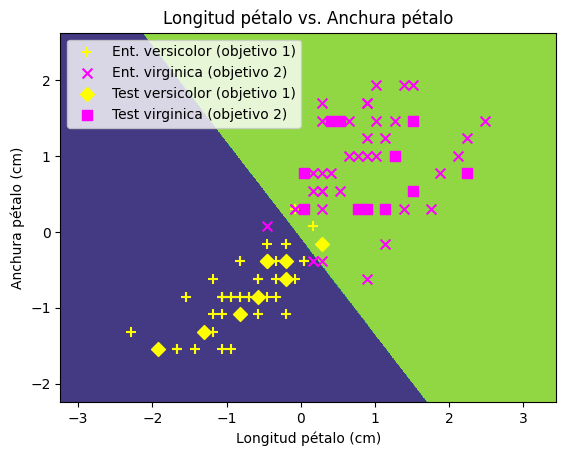

In [11]:
# Figura
fig = plt.figure(figsize = (7, 7))

# Valores de los parámetros de entrada
clase_A = 1
clase_B = 2
colores = ["yellow", "magenta"]
etiqueta_leyenda_cero = 'Ent. versicolor (objetivo 1)'
etiqueta_leyenda_uno = 'Ent. virginica (objetivo 2)'
titulo = "Longitud pétalo vs. Anchura pétalo"
titulo_eje_x = "Longitud pétalo (cm)"
titulo_eje_y = "Anchura pétalo (cm)"
simbolo_clase_A = '+'
simbolo_clase_B = 'x'
tamano_simbolo = 50
adicion_frontera = 1
curva_clasificador = 0
# Dibujamos el resultados correspondiente a los datos de entrenamiento
dibuja_resultado_clasificador(X_ent_escaladas, modelo_SVM_clasif_lineal, y_ent, clase_A, clase_B,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo_clase_A, simbolo_clase_B, tamano_simbolo, adicion_frontera, curva_clasificador)

# Dibujamos el resultados correspondiente a los datos de entrenamiento
etiqueta_leyenda_cero = 'Test versicolor (objetivo 1)'
etiqueta_leyenda_uno = 'Test virginica (objetivo 2)'
simbolo_clase_A = 'D'
simbolo_clase_B = 's'
adicion_frontera = 0
curva_clasificador = 0
dibuja_resultado_clasificador(X_test_escaladas, modelo_SVM_clasif_lineal, y_test, clase_A, clase_B,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo_clase_A, simbolo_clase_B, tamano_simbolo, adicion_frontera, curva_clasificador)

**Ejercicio 1: Efecto de la inclusión de nuevos datos fuera de la zona del margen**

Vamos a insertar nuevos datos en el conjunto de entrenamiento fuera de la zona del margen, creada alrededor de la frontera, para ver si tienen algún efecto en la generación de una nueva frontera. En el código siguiente se insertan los datos. 

Visualice la nueva frontera ¿Ha cambiado? ¿Por qué?

<Figure size 700x700 with 0 Axes>

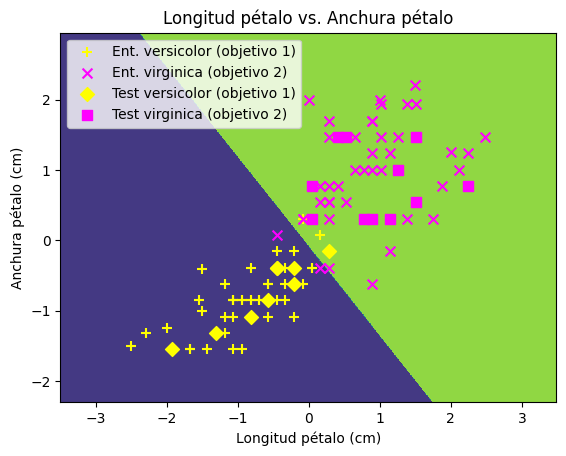

In [12]:
# Nuevos datos
X_ent_insercion_nuevas = np.array([[-2, -1.25], [-1.5, -0.4], [-2.5, -1.5], [-1.5, -1.0], [1.0, 2.0], [1.5, 2.2], [2.0, 1.25], [0.0, 2.0]])
y_ent_insercion_nuevas = np.array([1, 1, 1, 1, 2, 2, 2, 2])

# Insertamos los nuevos datos
X_ent_escaladas_nuevas=np.concatenate((X_ent_escaladas, X_ent_insercion_nuevas), axis=0)
y_ent_nuevas=np.concatenate((y_ent, y_ent_insercion_nuevas), axis=0)

# Reentrenamos la SVM con los nuevos datos
modelo_SVM_clasif_lineal.fit(X_ent_escaladas_nuevas, y_ent_nuevas)

# Dibujamos los datos y la nueva frontera de decisión
fig = plt.figure(figsize = (7, 7))

# Dibujamos el resultados correspondiente a los datos de entrenamiento
dibuja_resultado_clasificador(X_ent_escaladas_nuevas, modelo_SVM_clasif_lineal, y_ent_nuevas, clase_A, clase_B,
                              colores, 'Ent. versicolor (objetivo 1)', 'Ent. virginica (objetivo 2)',
                              'Longitud pétalo vs. Anchura pétalo', 'Longitud pétalo (cm)', 'Anchura pétalo (cm)',
                              '+', 'x', 50, 1, 0)

# Dibujamos el resultados correspondiente a los datos de test
dibuja_resultado_clasificador(X_test_escaladas, modelo_SVM_clasif_lineal, y_test, clase_A, clase_B,
                              colores, 'Test versicolor (objetivo 1)', 'Test virginica (objetivo 2)',
                              'Longitud pétalo vs. Anchura pétalo', 'Longitud pétalo (cm)', 'Anchura pétalo (cm)',
                              'D', 's', 50, 0, 0)
plt.show()

## SVM kernelizadas (no lineales). Tareas de clasificación.

**Introducción**

En las SVM se puede emplear el "truco del kernel" ("kernel trick") para conseguir fronteras de decisión no lineales, por lo que se pueden llegar a separar clases que no son separables de forma lineal. 

**Conjunto de datos**

Vamos a emplear los mismos datos de entrenamiento y test originales utilizados en la SVM lineal. Por lo tanto, no tiene que volver a emplear la función train_and_split. 

**Construcción y entrenamiento de la SVM kernelizada**

Emplearemos la clase `SVC`, ya explicada en la sección Programación de SVM en Scikit-learn. Los principales hiperparámetros de esta clase son:

<font color='blue'>C </font>: es el mismo parámetro que en LinearSVC.

<font color='blue'>tol </font>: tolerancia para el criterio de parada.

<font color='blue'>max_iter </font>: número máximo de iteraciones en el algoritmo de entrenamiento.

<font color='blue'>kernel </font>: el kernel puede ser lineal, polinómico, de función de base radial de tipo gaussiano, sigmoidal o precomputado {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}. El valor por defecto es *'rbf'*. Las ecuaciones de los kernels son:

Lineal:
$$
\begin{equation*}
    K(\textbf{a},\textbf{b}) = \textbf{a}^T\textbf{b}
\end{equation*}
$$

Polinómico: 
$$
\begin{equation*}
    K(\textbf{a},\textbf{b}) = (\gamma \textbf{a}^T\textbf{b} + r)^d
\end{equation*}
$$
Función de base radial gaussiana:
$$
\begin{equation*}
    K(\textbf{a},\textbf{b}) = e^{-\gamma ||\textbf{a} - \textbf{b}|| ^2 }
\end{equation*}
$$
Sigmoidal: 
$$
\begin{equation*}
    K(\textbf{a},\textbf{b}) = tanh(\gamma \textbf{a}^T\textbf{b} + r)
\end{equation*}
$$

<font color='blue'>degree </font>: es el grado del polinomio si se elige el kernel polinómico. El grado por defecto es 3.

<font color='blue'>gamma </font>: determina cómo es finalmente la función del kernel. Por ejemplo, en la función de base radial de tipo gausiano, indica la "anchura" de la función en torno al centro. 
El valor por defecto es *'scale'*, en ese caso se calcula como *'1 / (n_features * X.var())'*, es decir, 1 dividido por el número de características por la varianza de los datos de entrada.
Si vale *'auto'*, entonces es la inversa del número de características.
También se puede fijar a cualquier número real no negativo.

<font color='blue'>coef0 </font>: es el valor del término independiente (*r*) de la función de kernel. Sólo se emplea en el kernel polinómico y sigmoidal. Su valor por defecto es 0.

A continuación vamos a entrenar y validar una SVM con un kernel de tipo función de base radial gaussiana, con un valor de gamma igual a 0,5 y C igual a 1. El resto de valores tomarán los valores por defecto. Se emplea el mismo conjunto de datos de entrenamiento y de test que en la SVM lineal.

In [13]:
# Importamos la clase SVC
from sklearn.svm import SVC

# Instanciamos la clase LinearSVC
SVM_clasif_no_lineal = SVC(kernel='rbf', gamma=0.5, C=1, random_state=semilla)

# Entrenamos la SVM kernelizada no lineal
SVM_clasif_no_lineal.fit(X_ent_escaladas, y_ent)

SVC(C=1, gamma=0.5, random_state=80)

Como podrá comprobar al ejecutar el código siguiente, la frontera es no lineal.

<Figure size 700x700 with 0 Axes>

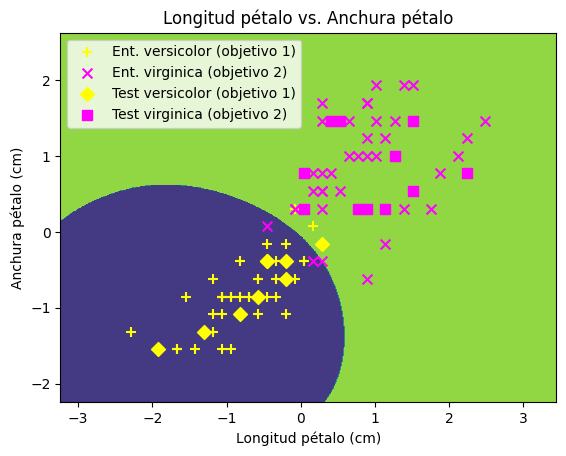

In [14]:
# Figura
fig = plt.figure(figsize = (7, 7))

# Valores de los parámetros de entrada
clase_A = 1
clase_B = 2
colores = ["yellow", "magenta"]
etiqueta_leyenda_cero = 'Ent. versicolor (objetivo 1)'
etiqueta_leyenda_uno = 'Ent. virginica (objetivo 2)'
titulo = "Longitud pétalo vs. Anchura pétalo"
titulo_eje_x = "Longitud pétalo (cm)"
titulo_eje_y = "Anchura pétalo (cm)"
simbolo_clase_A = '+'
simbolo_clase_B = 'x'
tamano_simbolo = 50
adicion_frontera = 1
curva_clasificador = 0
# Dibujamos el resultados correspondiente a los datos de entrenamiento
dibuja_resultado_clasificador(X_ent_escaladas, SVM_clasif_no_lineal, y_ent, clase_A, clase_B,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo_clase_A, simbolo_clase_B, tamano_simbolo, adicion_frontera, curva_clasificador)

# Dibujamos el resultados correspondiente a los datos de entrenamiento
etiqueta_leyenda_cero = 'Test versicolor (objetivo 1)'
etiqueta_leyenda_uno = 'Test virginica (objetivo 2)'
simbolo_clase_A = 'D'
simbolo_clase_B = 's'
adicion_frontera = 0
curva_clasificador = 0
dibuja_resultado_clasificador(X_test_escaladas, SVM_clasif_no_lineal, y_test, clase_A, clase_B,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo_clase_A, simbolo_clase_B, tamano_simbolo, adicion_frontera, curva_clasificador)

**Ejercicio 2: efecto del parámetro C**

Ahora vamos a probar dos nuevos valores del parámetro C. Obtenga el valor de acierto en el conjunto de test y la frontera de decisión para C igual a 0,05 (C= 0.05) y C igual a 100 (C= 100). Mantenga los valores del resto de hiperparámetros.

¿Qué diferencias observa entre las tres fronteras de decisión obtenidas hasta el momento? Razone la respuesta de acuerdo a los valores de C.

Precisión en el conjunto de entrenamiento: 0.9375
Precisión en el conjunto de test: 0.95


<Figure size 700x700 with 0 Axes>

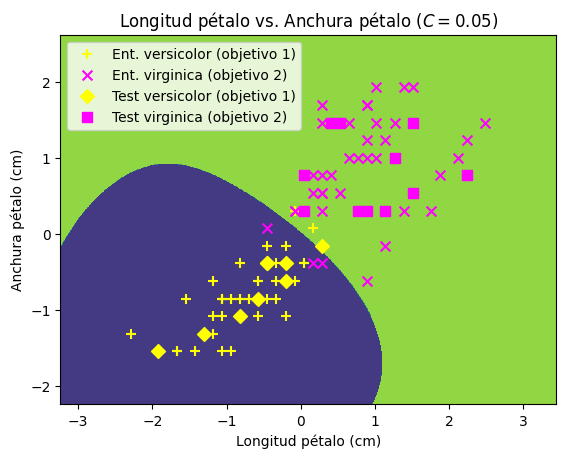

In [15]:
from sklearn.metrics import accuracy_score

# Entrenamos la SVM con C = 0.05
modelo_SVM_no_lineal_C_0_05 = SVC(C=0.05, random_state=semilla, gamma=0.5, kernel='rbf')
modelo_SVM_no_lineal_C_0_05.fit(X_ent_escaladas, y_ent)

y_ent_escaladas = modelo_SVM_no_lineal_C_0_05.predict(X_ent_escaladas)
y_test_escaladas = modelo_SVM_no_lineal_C_0_05.predict(X_test_escaladas)

print(f'Precisión en el conjunto de entrenamiento: {accuracy_score(y_ent, y_ent_escaladas)}')
print(f'Precisión en el conjunto de test: {accuracy_score(y_test, y_test_escaladas)}')

# Dibujamos los datos y la nueva frontera de decisión
fig = plt.figure(figsize = (7, 7))

# Dibujamos el resultados correspondiente a los datos de entrenamiento
dibuja_resultado_clasificador(X_ent_escaladas, modelo_SVM_no_lineal_C_0_05, y_ent, clase_A, clase_B,
                              colores, 'Ent. versicolor (objetivo 1)', 'Ent. virginica (objetivo 2)',
                              'Longitud pétalo vs. Anchura pétalo $(C=0.05)$', 'Longitud pétalo (cm)', 'Anchura pétalo (cm)',
                              '+', 'x', 50, 1, 0)

# Dibujamos el resultados correspondiente a los datos de test
dibuja_resultado_clasificador(X_test_escaladas, modelo_SVM_no_lineal_C_0_05, y_test, clase_A, clase_B,
                              colores, 'Test versicolor (objetivo 1)', 'Test virginica (objetivo 2)',
                              'Longitud pétalo vs. Anchura pétalo $(C=0.05)$', 'Longitud pétalo (cm)', 'Anchura pétalo (cm)',
                              'D', 's', 50, 0, 0)
plt.show()

Precisión en el conjunto de entrenamiento: 0.9625
Precisión en el conjunto de test: 0.95


<Figure size 700x700 with 0 Axes>

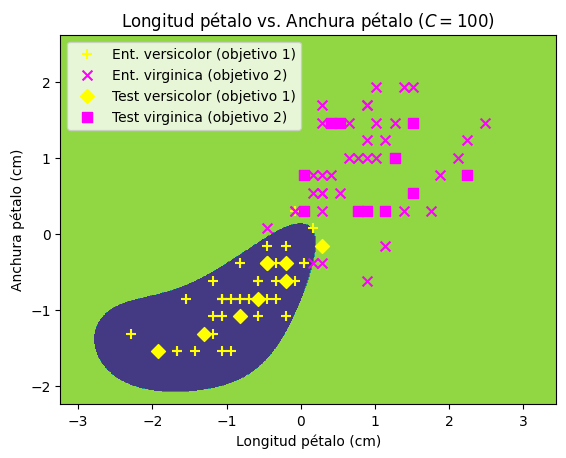

In [16]:
# Entrenamos la SVM con C = 100
modelo_SVM_no_lineal_C_100 = SVC(C=100, random_state=semilla, gamma=0.5, kernel='rbf')
modelo_SVM_no_lineal_C_100.fit(X_ent_escaladas, y_ent)

y_test_escaladas = modelo_SVM_no_lineal_C_100.predict(X_test_escaladas)
y_ent_escaladas = modelo_SVM_no_lineal_C_100.predict(X_ent_escaladas)

print(f'Precisión en el conjunto de entrenamiento: {accuracy_score(y_ent, y_ent_escaladas)}')
print(f'Precisión en el conjunto de test: {accuracy_score(y_test, y_test_escaladas)}')

# Dibujamos los datos y la nueva frontera de decisión
fig = plt.figure(figsize = (7, 7))

# Dibujamos el resultados correspondiente a los datos de entrenamiento
dibuja_resultado_clasificador(X_ent_escaladas, modelo_SVM_no_lineal_C_100, y_ent, clase_A, clase_B,
                              colores, 'Ent. versicolor (objetivo 1)', 'Ent. virginica (objetivo 2)',
                              'Longitud pétalo vs. Anchura pétalo $(C=100)$', 'Longitud pétalo (cm)', 'Anchura pétalo (cm)',
                              '+', 'x', 50, 1, 0)

# Dibujamos el resultados correspondiente a los datos de test
dibuja_resultado_clasificador(X_test_escaladas, modelo_SVM_no_lineal_C_100, y_test, clase_A, clase_B,
                              colores, 'Test versicolor (objetivo 1)', 'Test virginica (objetivo 2)',
                              'Longitud pétalo vs. Anchura pétalo $(C=100)$', 'Longitud pétalo (cm)', 'Anchura pétalo (cm)',
                              'D', 's', 50, 0, 0)
plt.show()

**Ejercicio 3: Análisis del efecto del hiperparámetro gamma en la SVM con kernel de función de base radial gaussiana**

En este ejercicio se pide programar la SVM con un kernel de función de base radial de tipo gaussiano para dos valores diferentes de gamma: 0,1 y 5, el hiperpárametro C vale 1 en los dos casos. Observe las fronteras de decisión. ¿Qué diferencias existen? ¿Por qué existen esas diferencias? 

Precisión en el conjunto de entrenamiento: 0.9375
Precisión en el conjunto de test: 0.95


<Figure size 700x700 with 0 Axes>

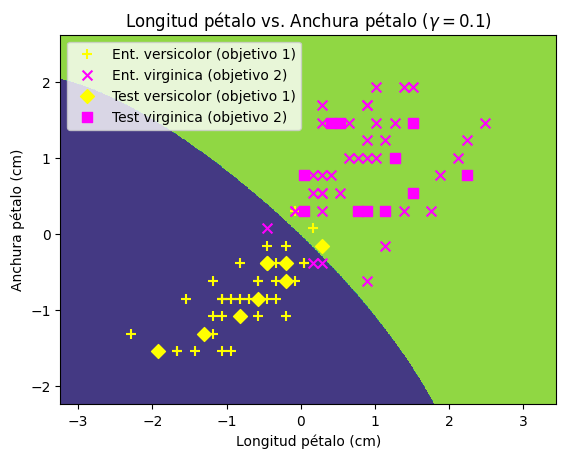

Precisión en el conjunto de entrenamiento: 0.9625
Precisión en el conjunto de test: 0.95


<Figure size 700x700 with 0 Axes>

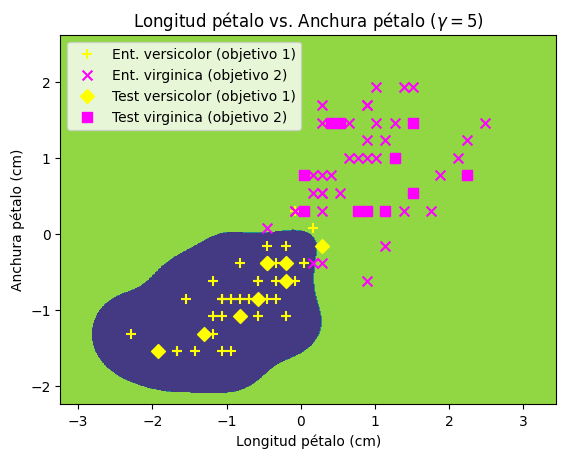

In [17]:
gammas = [0.1, 5]

for gamma in gammas:
    # Instanciamos la clase LinearSVC
    SVM_clasif_no_lineal = SVC(kernel='rbf', gamma=gamma, C=1, random_state=semilla)

    # Entrenamos la SVM kernelizada no lineal
    SVM_clasif_no_lineal.fit(X_ent_escaladas, y_ent)

    y_ent_escaladas = SVM_clasif_no_lineal.predict(X_ent_escaladas)
    y_test_escaladas = SVM_clasif_no_lineal.predict(X_test_escaladas)

    print(f'Precisión en el conjunto de entrenamiento: {accuracy_score(y_ent, y_ent_escaladas)}')
    print(f'Precisión en el conjunto de test: {accuracy_score(y_test, y_test_escaladas)}')

    # Dibujamos los datos y la nueva frontera de decisión
    fig = plt.figure(figsize = (7, 7))

    # Dibujamos el resultados correspondiente a los datos de entrenamiento
    dibuja_resultado_clasificador(X_ent_escaladas, SVM_clasif_no_lineal, y_ent, clase_A, clase_B,
                                colores, 'Ent. versicolor (objetivo 1)', 'Ent. virginica (objetivo 2)',
                                fr'Longitud pétalo vs. Anchura pétalo ($\gamma={gamma}$)', 'Longitud pétalo (cm)', 'Anchura pétalo (cm)',
                                '+', 'x', 50, 1, 0)

    # Dibujamos el resultados correspondiente a los datos de test
    dibuja_resultado_clasificador(X_test_escaladas, SVM_clasif_no_lineal, y_test, clase_A, clase_B,
                                colores, 'Test versicolor (objetivo 1)', 'Test virginica (objetivo 2)',
                                fr'Longitud pétalo vs. Anchura pétalo ($\gamma={gamma}$)', 'Longitud pétalo (cm)', 'Anchura pétalo (cm)',
                                'D', 's', 50, 0, 0)
    plt.show()

**Estimación del mejor conjunto de hiperparámetros**

Como se ha visto los hiperparámetros gamma ($\gamma$) y C tienen una influencia decisiva en la forma de la frontera de decisión de la SVM y por tanto en el rendimiento de la SVM.


Vamos a emplear de nuevo la función `GridSearchCV()`. Vamos a estimar los mejores hiperparámetros en el problema que estamos tratando para una SVM con un kernel de función de base radial gaussiana. Los hiperparámetros variarán entre los siguientes valores: C podrá valer 0,1, 1, 10, 100 y 1000, gamma podrá valer 0,05, 0,5, 2 y 5.


Vamos a tomar número de subconjuntos o *folds* igual a 5.

Vamos a emplear la clase `Pipeline()` de *Scikit-learn* para que la estandarización sólo se calcule con los datos de entrenamiento en cada iteración del algoritmo.

In [18]:
# Importamons la biblioteca para generar todas las combinaciones de parámetros de entrenamiento
from sklearn.model_selection import GridSearchCV

# Importamos la clase Pipeline para poder escalar cuando se emplea cross_val_score
from sklearn.pipeline import Pipeline

# Generamos el pipeline adecuado: emplea un estimador que es la
# SVM para clasificación
pipeline = Pipeline([ ('transformador', scaler), ('SVM_CL',SVC())])

Creamos la rejilla de hiperparámetros, fijamos el número de folds o subconjuntos, la función utilidad (*accuracy*) e instanciamos el modelo que vamos a evaluar (`SVC`).

In [19]:
# Los valores de los hiperparámetros se guardan en un diccionario o en una lista de diccionarios
rejilla_hiperparametros = {
                            'SVM_CL__C': [0.1, 1, 10, 100, 1000], 
                            'SVM_CL__kernel': ['rbf'], 
                            'SVM_CL__gamma': [0.05, 0.5, 2, 5]
                            }

# Número de folds para la validación cruzada
numero_subconjuntos = 5

# Función utilidad
funcion_utilidad = "accuracy"

Creamos el "grid" y lo aplicamos al conjunto de entrenamiento sin escalar, ya que el escalado se realiza de forma interna.

In [20]:
# Se crean todas las configuraciones de la SVM
grid_search = GridSearchCV(pipeline, 
                           rejilla_hiperparametros, 
                           cv=numero_subconjuntos,
                           scoring=funcion_utilidad,
                           refit=True, 
                           return_train_score=True)

# Ahora el conjunto de datos de entrenamiento es empleado con grid_search 
# y el conjunto de test se empleará posteriormente una vez seleccionada la mejor configuración
# Como esta partición se ha realizado anteriormente se puede reutilizar

# Entrenamiento y validación de todas las configuraciones
grid_search.fit(X_ent, y_ent)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformador', StandardScaler()),
                                       ('SVM_CL', SVC())]),
             param_grid={'SVM_CL__C': [0.1, 1, 10, 100, 1000],
                         'SVM_CL__gamma': [0.05, 0.5, 2, 5],
                         'SVM_CL__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

**Ejercico 4: Resultados de GridSearchCV**

Obtenga la media y la desviación estándar de cada configuración así como el mejor resultado (puede haber un empate entre varias configuraciones).

Obtenga la mejor configuración.


In [21]:
# Obtener los resultados de la búsqueda en la rejilla
resultados = grid_search.cv_results_

# Imprimir la media y la desviación estándar de los resultados de la validación cruzada
for media, desviacion, params in zip(resultados['mean_test_score'], resultados['std_test_score'], resultados['params']):
    print(f"{params}\n\tMedia:{media:.3f}\n\tDesviación: {desviacion:.3f}")

# Obtener la mejor configuración
mejores_hiperparametros = grid_search.best_params_
mejor_puntaje = grid_search.best_score_

print(f"Mejor configuración: {mejores_hiperparametros}")
print(f"Mejor puntaje: {mejor_puntaje:.3f}")

{'SVM_CL__C': 0.1, 'SVM_CL__gamma': 0.05, 'SVM_CL__kernel': 'rbf'}
	Media:0.900
	Desviación: 0.064
{'SVM_CL__C': 0.1, 'SVM_CL__gamma': 0.5, 'SVM_CL__kernel': 'rbf'}
	Media:0.938
	Desviación: 0.056
{'SVM_CL__C': 0.1, 'SVM_CL__gamma': 2, 'SVM_CL__kernel': 'rbf'}
	Media:0.925
	Desviación: 0.047
{'SVM_CL__C': 0.1, 'SVM_CL__gamma': 5, 'SVM_CL__kernel': 'rbf'}
	Media:0.887
	Desviación: 0.083
{'SVM_CL__C': 1, 'SVM_CL__gamma': 0.05, 'SVM_CL__kernel': 'rbf'}
	Media:0.938
	Desviación: 0.056
{'SVM_CL__C': 1, 'SVM_CL__gamma': 0.5, 'SVM_CL__kernel': 'rbf'}
	Media:0.938
	Desviación: 0.056
{'SVM_CL__C': 1, 'SVM_CL__gamma': 2, 'SVM_CL__kernel': 'rbf'}
	Media:0.938
	Desviación: 0.056
{'SVM_CL__C': 1, 'SVM_CL__gamma': 5, 'SVM_CL__kernel': 'rbf'}
	Media:0.938
	Desviación: 0.056
{'SVM_CL__C': 10, 'SVM_CL__gamma': 0.05, 'SVM_CL__kernel': 'rbf'}
	Media:0.938
	Desviación: 0.056
{'SVM_CL__C': 10, 'SVM_CL__gamma': 0.5, 'SVM_CL__kernel': 'rbf'}
	Media:0.938
	Desviación: 0.056
{'SVM_CL__C': 10, 'SVM_CL__gamma': 

## SVM. Tareas de regresión.

**Introducción**

Las SVM también pueden realizar tareas de regresión tanto lineal como no lineal. Para ello se debe cambiar el objetivo de generación de la SVM: en lugar de construir un margen entre clases que limite a su vez el número de violaciones en el margen, en la regresión se trata de ajustar el mayor número posible de datos dentro del margen mientras se minimiza el número de datos fuera del margen. La anchura del margen se controla con el hiperparámetro $\epsilon$. En los siguientes ejercicios vamos a analizar el rendimiento de una SVM en una tarea de regresión.

**Construcción de la SVM para tareas de regresión**

En *Scikit-learn* existen dos clases para tareas de regresión: `SVR`, que emplea el "truco" del kernel y `LinearSVR` que es similar a la versión de SVR con el kernel lineal.

Los principales hiperparámetros de `SVR` y de `LinearSVR` son los mismos que los de `SVC` y `LinearSVC` respectivamente, con la diferencia principal de añadir el parámetro $\epsilon$ :

<font color='blue'> epsilon </font>: tiene que ser no negativo (positivo o cero) y el valor por defecto es 0.1 en SVR y 0.0 en LinearSVR.



**Base de datos del problema de regresión**

Al igual que en la sesión de perceptrones, vamos a emplear la base de datos de precio y demanda de electricidad en dos estados australianos. A continuación, cargamos la base de datos.

In [22]:
from sklearn.datasets import fetch_openml

# Información sobre fetch_openml
# https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml

#electricidad_dataframe = fetch_openml(name='electricity', version=1, as_frame=True)

# También podemos cargar el conjunto de datos con el fichero proporcionado
electricidad_dataframe = pd.read_csv('Electricidad.csv', sep=',')

De nuevo, vamos a considerar únicamente dos variables: los periodos de tiempo correspondientes a dos días consecutivos y la demanda de electricidad.

In [23]:
# Seleccionamos el periodo y la demanda. 
# La variable x es el periodo y la variable y la demanda
caracteristica_seleccionada = "period"
X_reg_ini = electricidad_dataframe["period"]
y_reg_ini = electricidad_dataframe["nswdemand"]
#X_reg_ini = electricidad.data[caracteristica_seleccionada]
#y_reg_ini = electricidad.data["nswdemand"]

# Se seleccionan los datos de dos días. 
num_dias = 2
num_datos_dia = 48

# La variable dia_ini indica que el primer día será el siguiente al cuarto, es decir,
# el viernes. Por tanto, seleccionamos los datos del primer viernes y el primer sábado
dia_ini = 4
ini = num_datos_dia*dia_ini
fin = ini+num_dias*num_datos_dia

rango = np.arange(ini, fin, 1)
X_reg_ini = X_reg_ini[rango]
y_reg_ini = y_reg_ini[rango]

lista = list(range(0, num_dias))
for indice in range(num_dias):
    rango_bucle = rango[0+indice*num_datos_dia:num_datos_dia*(indice+1)-1]
    X_reg_ini[rango_bucle] = X_reg_ini[rango_bucle] + lista[indice]

A continuación dibujamos los datos seleccionados

Text(0, 0.5, 'Demanda eléctrica')

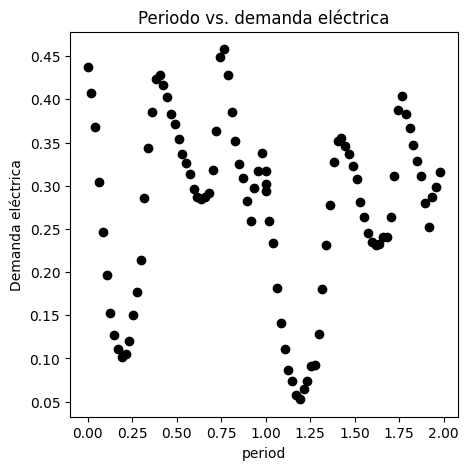

In [24]:
# Figura
# Mostramos los datos del conjunto de los dos días
fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(X_reg_ini, y_reg_ini, color='black', marker='o')
titulo = "Periodo vs. demanda eléctrica"
titulo_eje_x = caracteristica_seleccionada
titulo_eje_y = "Demanda eléctrica"
plt.title(titulo)
plt.xlabel(titulo_eje_x)
plt.ylabel(titulo_eje_y)

Extraemos los datos y transformamos al formato correcto.

In [25]:
# X_reg e y_reg son Series de pandas, extraemos los datos y transformamos al formato correcto
X_reg = X_reg_ini.values
X_reg = X_reg.reshape(-1, 1)
y_reg = y_reg_ini.values

Generamos los conjuntos de entrenamiento y de test. Asignamos un 20% de ejemplos al conjunto de test.

In [26]:
# Generamos los conjuntos de entrenamiento y test
# El conjunto de test es un 20% de las muestras
X_reg_ent, X_reg_test, y_reg_ent, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.20, random_state=semilla)

Al igual que en la SVM de clasificación, vamos a estandarizar los datos para conseguir un rendimiento mejor. En el código de la siguiente celda se aplica el escalado proporcionado por la clase `StandardScaler()`. La estandarización se calcula con los datos de entrenamiento y se aplica a los datos de entrenamiento y de test.

In [27]:
# Estandarización del conjunto de entrenamiento
X_reg_ent_escaladas = scaler.fit_transform(X_reg_ent)

# Aplicamos la estandarización calculada con los datos de entrenamiento a los datos de test
X_reg_test_escaladas = scaler.transform(X_reg_test)

**Construcción de una SVM no lineal para regresión**

A continuación, construimos una SVM no lineal para tratar de aproximar los valores del problema de regresión. La SVM va a tener kernel de tipo función de base radial, con un valor de gamma igual a 1, epsilon igual a 0,01 y un valor de C igual a 10.

In [28]:
# Importamos la clase Linear SVR
from sklearn.svm import SVR

# Instancia de la SVM lineal
SVM_no_lineal_reg = SVR(kernel='rbf', gamma=1, epsilon=0.01, C=10)

# Entrenamos la SVM lineal de regresión
SVM_no_lineal_reg.fit(X_reg_ent_escaladas, y_reg_ent)

SVR(C=10, epsilon=0.01, gamma=1)

Obtenemos las predicciones en el conjunto de entrenamiento y de test.

In [29]:
# Salidas de la SVM de regresión no lineal
y_reg_sal_ent = SVM_no_lineal_reg.predict(X_reg_ent_escaladas)
y_reg_sal_test = SVM_no_lineal_reg.predict(X_reg_test_escaladas)

La siguiente función permite dibujar los resultados.

In [30]:
# Programamos una función para dibujar conjuntos de puntos y que 
# opcionalmente puede dibujar la curva que genera el MLP
def dibuja_puntos(Entradas, modelo, Salidas_verdaderas, Salidas_predichas, 
                  colores, etiqueta_verdadera, etiqueta_prediccion, 
                  simbolo, tamano_simbolo, titulo, titulo_eje_x, titulo_eje_y, dibuja_curva):
    ''' Dibuja los puntos originales y las salidas generadas por el modelo de 
    machine learning '''

    color_verdaderas = colores[0]
    plt.scatter(Entradas, Salidas_verdaderas, marker=simbolo, s=tamano_simbolo, 
                color=color_verdaderas, label=etiqueta_verdadera)

    color_prediccion = colores[1]
    plt.scatter(Entradas, Salidas_predichas, marker=simbolo, 
                s=tamano_simbolo, color=color_prediccion, label=etiqueta_prediccion)

    if (dibuja_curva == 1):

        minX = min(Entradas)       # Valor mínimo del eje x
        maxX = max(Entradas)       # Valor máximo del eje y
        marginX = (maxX - minX) * 0.0  # 5 % del rango
        # Valores del eje x para dibujar la curva
        Entradas_linea = np.linspace(minX-marginX, maxX+marginX, 200)
        Salidas_linea = modelo.predict(Entradas_linea)

        plt.plot(Entradas_linea, Salidas_linea, color='green', label='Curva generada')

    plt.title(titulo)
    plt.xlabel(titulo_eje_x)
    plt.ylabel(titulo_eje_y)
    plt.legend()

Dibujamos los resultados. Se muestra lo siguiente:

+ Los datos del conjunto de entrenamiento con círculos azules.
+ Las predicciones del conjunto de entrenamiento con círculos magenta.
+ La curva que genera el modelo con una línea continua en color verde.
+ Los datos del conjunto de test con diamantes negros.
+ Las predicciones del conjunto de test con diamantes verde.

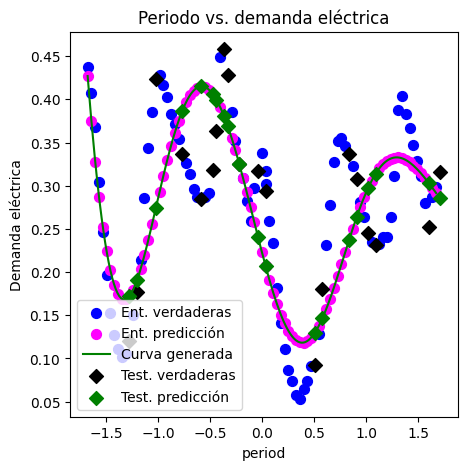

In [31]:
# Figura
fig, ax = plt.subplots(figsize = (5, 5))

colores = ["blue", "magenta"]
etiqueta_verdadera = 'Ent. verdaderas'
etiqueta_prediccion = 'Ent. predicción'
titulo = "Periodo vs. demanda eléctrica"
titulo_eje_x = caracteristica_seleccionada
titulo_eje_y = "Demanda eléctrica"
simbolo = 'o'
tamano_simbolo = 50
dibuja_curva = 1
dibuja_puntos(X_reg_ent_escaladas, SVM_no_lineal_reg, y_reg_ent, y_reg_sal_ent, 
                  colores, etiqueta_verdadera, etiqueta_prediccion, 
                  simbolo, tamano_simbolo, titulo, titulo_eje_x, titulo_eje_y, dibuja_curva)


colores = ["black", "green"]
etiqueta_verdadera = 'Test. verdaderas'
etiqueta_prediccion = 'Test. predicción'
simbolo = 'D'
tamano_simbolo = 50
dibuja_curva = 0
dibuja_puntos(X_reg_test_escaladas, SVM_no_lineal_reg, y_reg_test, y_reg_sal_test, 
                  colores, etiqueta_verdadera, etiqueta_prediccion, 
                  simbolo, tamano_simbolo, titulo, titulo_eje_x, titulo_eje_y, dibuja_curva)

**Ejercicio 5: análisis del rendimiento del regresor**

Obtenga la métrica de error cuadrático medio del regresor construido en el conjunto de entrenamiento y de test.

A la vista de los resultados gráficos, ¿es preciso el aproximador construido? ¿presenta un problema de subajuste? ¿presenta un problema de sobreajuste?

In [33]:
from sklearn.metrics import mean_squared_error

# Calcular el MSE en el conjunto de entrenamiento
mse_ent = mean_squared_error(y_reg_ent, y_reg_sal_ent)
print(f"Error cuadrático medio en el conjunto de entrenamiento: {mse_ent:.2f}")

# Calcular el MSE en el conjunto de test
mse_test = mean_squared_error(y_reg_test, y_reg_sal_test)
print(f"Error cuadrático medio en el conjunto de test: {mse_test:.2f}")

Error cuadrático medio en el conjunto de entrenamiento: 0.01
Error cuadrático medio en el conjunto de test: 0.01


**Ejercicio 6: construcción de una SVM no lineal para regresión y análisis de su rendimiento**

A continuación, programe la SVM con un valor de gamma igual a 2000. Mantenga los valores del resto de hiperparámetros.

Dibuje los resultados con la función proporcionada. Obtenga el error cuadrático medio en el conjunto de entrenamiento y de test.

Utilice los mismos conjuntos de entrenamiento y test estandarizados que en el caso anterior.

El aproximador construido, ¿ha mejorado el rendimiento?, ¿presenta un problema de subajuste? ¿presenta un problema de sobreajuste?

In [ ]:
# Instanciamos la SVM no lineal para la regresión con gamma=2000
SVM_no_lineal_reg = SVR(kernel='rbf', gamma=2000, epsilon=0.01, C=10)

# Entrenamos la SVM no lineal de regresión
SVM_no_lineal_reg.fit(X_reg_ent_escaladas, y_reg_ent)

# Salidas de la SVM de regresión no lineal
y_reg_sal_ent = SVM_no_lineal_reg.predict(X_reg_ent_escaladas)
y_reg_sal_test = SVM_no_lineal_reg.predict(X_reg_test_escaladas)

SVR(C=10, epsilon=0.01, gamma=2000)

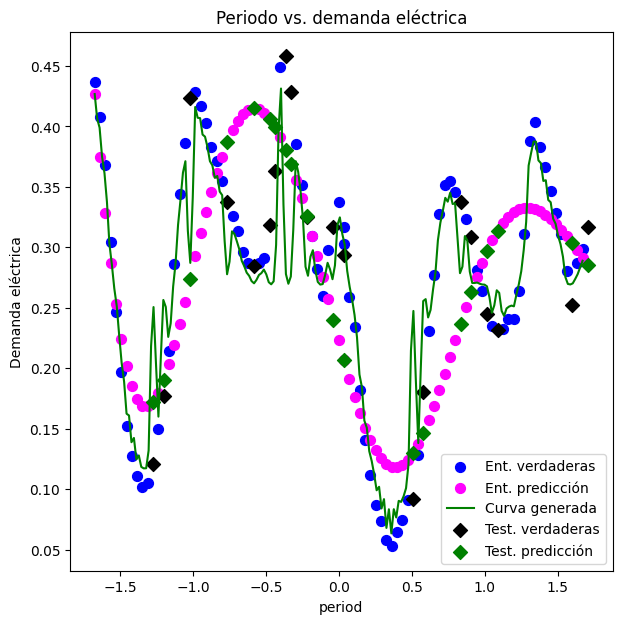

In [38]:
# Figura
fig, ax = plt.subplots(figsize = (7, 7))

colores = ["blue", "magenta"]
etiqueta_verdadera = 'Ent. verdaderas'
etiqueta_prediccion = 'Ent. predicción'
titulo = "Periodo vs. demanda eléctrica"
titulo_eje_x = caracteristica_seleccionada
titulo_eje_y = "Demanda eléctrica"
simbolo = 'o'
tamano_simbolo = 50
dibuja_curva = 1
dibuja_puntos(X_reg_ent_escaladas, SVM_no_lineal_reg, y_reg_ent, y_reg_sal_ent, 
                  colores, etiqueta_verdadera, etiqueta_prediccion, 
                  simbolo, tamano_simbolo, titulo, titulo_eje_x, titulo_eje_y, dibuja_curva)


colores = ["black", "green"]
etiqueta_verdadera = 'Test. verdaderas'
etiqueta_prediccion = 'Test. predicción'
simbolo = 'D'
tamano_simbolo = 50
dibuja_curva = 0
dibuja_puntos(X_reg_test_escaladas, SVM_no_lineal_reg, y_reg_test, y_reg_sal_test, 
                  colores, etiqueta_verdadera, etiqueta_prediccion, 
                  simbolo, tamano_simbolo, titulo, titulo_eje_x, titulo_eje_y, dibuja_curva)

**Ejercicio 7: resultados de GridSearchCV**

Vamos a emplear `GridSearchCV` para estimar el mejor valor de gamma ($\gamma$). Los valores de gamma que vamos a probar son: 1, 5, 10, 20, 50 y 100.

Los valores de C podrán ser iguales a 0.1, 1, 10, 100. Utilizaremos un kernel de función de base radial gaussiana.

Aplique `GridSearchCV` para buscar la mejor configuración. Emplee de nuevo '*Pipeline*' para aplicar la estandarización de los datos. Emplearemos la función de utilidad `neg_mean_squared_error`.

Obtenga el mejor estimador, dibuje el resultado de la aproximación utilizando el mejor estimador y obtenga el error cuadrático medio en el conjunto de entrenamiento y de test. El resultado no debería ni sub-ajustar ni sobre-ajustar.